## 1) Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Part 1: Data Visualization of the damaged car parts

# 2) Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 

import os
for directoryname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(directoryname, filename))

In [3]:
pwd

'/content'

In [6]:
pwd

'/content'

In [7]:
cd /content/drive/MyDrive/CarPartsDamageDetection

/content/drive/MyDrive/CarPartsDamageDetection


## Download the git repository of cocoapi 

In [8]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-oe91_tp8
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-oe91_tp8


#### Import the required visualization libraries 

In [9]:
%matplotlib inline 
# magic function that renders the figure in a notebook
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0) # Define the width, height of figure in inches
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

# 3) Define the dataset directories for test images

In [10]:
data_directory='/content/drive/MyDrive/CarPartsDamageDetection/val'
data_type='COCO_val_annos'
multiple_data_types='COCO_mul_val_annos'
ann_file='{}/{}.json'.format(data_directory,data_type)
multiple_ann_files='{}/{}.json'.format(data_directory,multiple_data_types)
image_directory = '/content/drive/MyDrive/CarPartsDamageDetection/img'

# 4) Initialize coco api for instance annotations


In [11]:
coco=COCO(ann_file)
multiple_coco=COCO(multiple_ann_files)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


# 5) Display categories and supercategories

#### 1) Single Class and Damage dataset

In [12]:
categories = coco.loadCats(coco.getCatIds())
names=[category['name'] for category in categories]
print('COCO categories for damages: \n{}\n'.format(', '.join(names)))

names = set([category['supercategory'] for category in categories])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(names)))

#Multi Class #Parts dataset
multiple_categories = multiple_coco.loadCats(multiple_coco.getCatIds())
multiple_names=[category['name'] for category in multiple_categories]
print('COCO categories for parts: \n{}\n'.format(', '.join(multiple_names)))

multiple_names = set([multiple_category['supercategory'] for multiple_category in multiple_categories])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(multiple_names)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



# 6) Find all images containing 'damage' categories and select one category at random


In [13]:
category_Ids = coco.getCatIds(catNms=['damage']);
image_Ids = coco.getImgIds(catIds=category_Ids );

In [14]:
print(category_Ids)

[1]


In [15]:
print(image_Ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Choosing one category at random

In [16]:
random_image_id = random.choice(image_Ids)
print(" Image Id = {} was selected at random from this {} list".format(random_image_id, image_Ids))

 Image Id = 3 was selected at random from this [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


# 7) Load the randomly selected image 

In [17]:
image_Id = coco.getImgIds(imgIds = [random_image_id])
image = coco.loadImgs(image_Id)[0]
print("Image details \n",image)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '3.jpg', 'flickr_url': '', 'height': 1024, 'id': 3, 'license': 1, 'width': 1024}


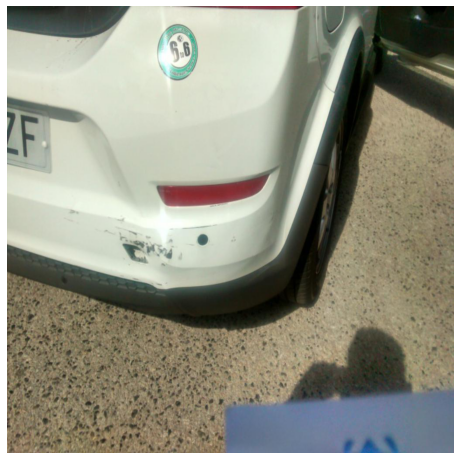

In [18]:
I = io.imread(image_directory + '/' + image['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

# 8) Obtain the damage annotations for that particular image

In [19]:
annotation_Ids = coco.getAnnIds(imgIds=image_Id,iscrowd=None)
annotation_files = coco.loadAnns(annotation_Ids)

In [20]:
print(annotation_Ids)

[6]


In [21]:
print(annotation_files)

[{'area': 2651.999999999999, 'bbox': [247, 479, 135, 99], 'category_id': 1, 'id': 6, 'image_id': 3, 'iscrowd': 0, 'segmentation': [[264, 479, 247, 488, 247, 501, 249, 521, 255, 536, 261, 537, 282, 542, 288, 545, 302, 548, 307, 559, 317, 563, 328, 564, 341, 574, 355, 574, 371, 578, 382, 576, 380, 553, 357, 551, 341, 541, 326, 536, 328, 526, 313, 523, 290, 511, 276, 509, 270, 498, 270, 483]]}]


# 9) Plot damages


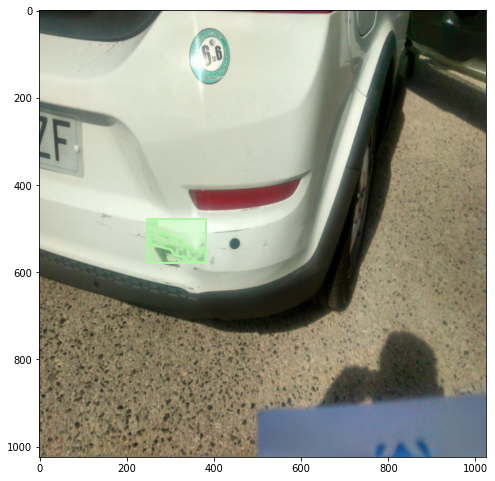

In [22]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(annotation_files, draw_bbox=True )

# 10) Obtain the multiple damaged parts annotations


In [23]:
multiple_annotation_Ids = multiple_coco.getAnnIds(imgIds=image_Id,iscrowd=None)
multiple_annotation_files = multiple_coco.loadAnns(multiple_annotation_Ids)

In [24]:
print(multiple_annotation_Ids)

[12, 13, 14]


In [25]:
print(multiple_annotation_files)

[{'area': 21689.999999999116, 'bbox': [3, 377, 679, 330], 'category_id': 2, 'id': 12, 'image_id': 3, 'iscrowd': 0, 'segmentation': [[5, 421, 260, 487, 403, 507, 571, 471, 630, 377, 649, 483, 682, 533, 634, 653, 515, 699, 356, 707, 153, 651, 3, 607]]}, {'area': 4428.000000000099, 'bbox': [710, 4, 138, 291], 'category_id': 3, 'id': 13, 'image_id': 3, 'iscrowd': 0, 'segmentation': [[710, 7, 710, 89, 722, 161, 741, 195, 768, 219, 810, 108, 809, 149, 794, 295, 843, 111, 839, 81, 848, 4]]}, {'area': 9227.500000000033, 'bbox': [345, 386, 257, 71], 'category_id': 1, 'id': 14, 'image_id': 3, 'iscrowd': 0, 'segmentation': [[346, 407, 473, 411, 602, 386, 578, 426, 478, 456, 364, 457, 345, 423]]}]


# 11) Create a dictionary between category_id and category name


In [26]:
category_map = dict()

for element in list(multiple_coco.cats.values()):
    category_map.update({element['id']:element['name']})

In [27]:
print(category_map)

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}


# 12) Create a list of parts in the image


Parts are: ['rear_bumper', 'door', 'headlamp']


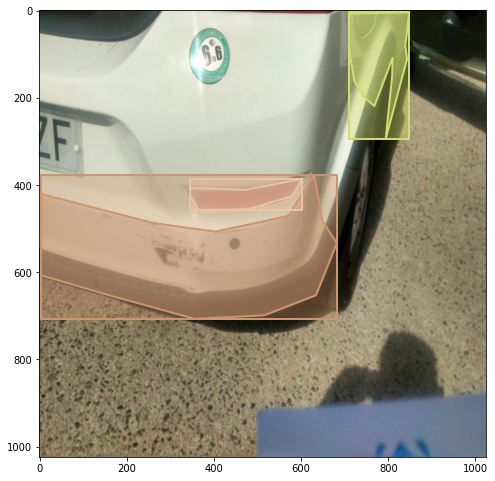

In [28]:
parts = []
for region in multiple_annotation_files:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(image_directory + '/' + image['file_name'])
plt.imshow(I)
plt.axis('on')
multiple_coco.showAnns(multiple_annotation_files, draw_bbox=True )

# Part 2: Detectron2 Car Damaged Parts Detection Model

# 13) Training Object detection model using Detectron 2

### Install detectron 2


In [29]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
  Using cached pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


### Import the libraries for torchvision, detectron2

In [30]:
!pip install torch==1.7.0

In [31]:
!pip install torchvision==0.8.1

In [32]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


## Import the necessay libraries of detectron2

In [33]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

## Checking for the correct versions of CUDA, detectron, PyTorch

In [34]:
!python -m detectron2.utils.collect_env

----------------------  ---------------------------------------------------------
sys.platform            linux
Python                  3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.5 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     True
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.8.1 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.5.post20210722
iopath                  0.1.8
cv2                     4.1.2
----------------------  ----------------------------

# 14) Using Car Damaged Parts Dataset

In [35]:
dataset_directory = "/content/drive/MyDrive/CarPartsDamageDetection"
image_directory = "img/"
train_directory = "train/"
validation_directory = "val/"
test_directory = "test/"

In [36]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_directory,train_directory,"COCO_train_annos.json"), os.path.join(dataset_directory,image_directory))
register_coco_instances("car_dataset_validation", {}, os.path.join(dataset_directory,validation_directory,"COCO_val_annos.json"), os.path.join(dataset_directory,image_directory))

In [37]:
print(register_coco_instances)

<function register_coco_instances at 0x7fb6057aca70>


In [38]:
dataset_dictionaries = DatasetCatalog.get("car_dataset_train")
metadata_dictionaries = MetadataCatalog.get("car_dataset_train")

[07/23 11:11:11 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/train/COCO_train_annos.json


In [39]:
print(dataset_dictionaries)

[{'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/img/10.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [300, 216, 79, 22], 'category_id': 0, 'segmentation': [[379, 216, 337, 218, 300, 223, 318, 238, 350, 237, 369, 231, 375, 227]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [226, 230, 62, 34], 'category_id': 0, 'segmentation': [[288, 230, 264, 238, 245, 249, 226, 264, 241, 264, 249, 253, 269, 253, 275, 250, 284, 238]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [161, 276, 65, 68], 'category_id': 0, 'segmentation': [[161, 331, 191, 326, 200, 276, 207, 315, 226, 322, 222, 337, 196, 344, 184, 342]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [254, 273, 67, 26], 'category_id': 0, 'segmentation': [[258, 273, 289, 273, 318, 275, 321, 289, 307, 299, 283, 296, 264, 291, 254, 285]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [233, 392, 123, 95], 'category_id': 0, 'segment

In [40]:
print(metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/CarPartsDamageDetection/img/', json_file='/content/drive/MyDrive/CarPartsDamageDetection/train/COCO_train_annos.json', name='car_dataset_train', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


# 15) Training the model

#### To implement our own Training Module to be used for  the COCO validation evaluation during training


In [41]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [42]:
!pip show torchvision

Name: torchvision
Version: 0.8.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, pillow, torch
Required-by: fastai


# 16) Running COCO-InstanceSegmentation algorithm on a MaskCNN 

In [43]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_validation",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 800)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[07/23 11:11:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[07/23 11:11:37 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python

[07/23 11:11:46 d2.utils.events]:  eta: 0:03:20  iter: 19  total_loss: 2.225  loss_cls: 1.012  loss_box_reg: 0.3647  loss_mask: 0.6914  loss_rpn_cls: 0.1306  loss_rpn_loc: 0.0179  time: 0.4140  data_time: 0.0221  lr: 3.8962e-05  max_mem: 3183M
[07/23 11:12:02 d2.utils.events]:  eta: 0:03:06  iter: 59  total_loss: 1.614  loss_cls: 0.4134  loss_box_reg: 0.3876  loss_mask: 0.6521  loss_rpn_cls: 0.0834  loss_rpn_loc: 0.02225  time: 0.4140  data_time: 0.0081  lr: 0.00011888  max_mem: 3183M
[07/23 11:12:11 d2.utils.events]:  eta: 0:02:58  iter: 79  total_loss: 1.638  loss_cls: 0.4268  loss_box_reg: 0.489  loss_mask: 0.6122  loss_rpn_cls: 0.06727  loss_rpn_loc: 0.0203  time: 0.4162  data_time: 0.0078  lr: 0.00015884  max_mem: 3183M
[07/23 11:12:19 d2.utils.events]:  eta: 0:02:51  iter: 99  total_loss: 1.539  loss_cls: 0.3769  loss_box_reg: 0.4633  loss_mask: 0.5645  loss_rpn_cls: 0.0574  loss_rpn_loc: 0.01936  time: 0.4176  data_time: 0.0082  lr: 0.0001988  max_mem: 3183M
[07/23 11:12:27 d2.u

# 17) Model Metrics and Hyper Parameters Visualization


In [44]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_validation = last * weight + (1 - weight) * point
        smoothed.append(smoothed_validation)
        last = smoothed_validation
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [45]:
plots = plot(logdir= './output', savedir= './')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 1152x648 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
plots

#### Plots for different model metrics

In [56]:
my_dpi = 1000
fig, ax = plt.subplots(2,1, figsize = (20,20), dpi=my_dpi)

ax[0].set_title('Total Loss', fontsize=12)
x=ax[0].set_xticks([])
ax[0].set_xticklabels(x, fontsize=20)  
y=ax[0].set_yticks([])
ax[0].set_yticklabels(y, fontsize=20)  
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

# ax[1].set_title('Bounding Box Average Precision', fontsize=12)
# ax[1].set_xticks([])
# ax[1].set_yticks([])
# ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

# ax[2].set_title('Segmentation Average Precision', fontsize=12)
# ax[2].set_xticks([])
# ax[2].set_yticks([])
# ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[1].set_title('Class Accuracy', fontsize=12)
ax[1].set_xticks([])
ax[1].set_xticklabels([], fontsize=20)  
ax[1].set_yticks([])
ax[1].set_yticklabels([], fontsize=20)  
ax[1].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

# 18) Evaluate the Model

In [ ]:
evaluator = COCOEvaluator("car_dataset_validation", cfg, False, output_dir="./output/")
validation_loader = build_detection_test_loader(cfg, "car_dataset_validation")
print(inference_on_dataset(trainer.model, validation_loader, evaluator))

# 19) Conclusions drawn from the car parts damage detection model

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_validation", )
predictor = DefaultPredictor(cfg)

In [ ]:
valid_dataset_dictionaries = DatasetCatalog.get("car_dataset_validation")
valid_metadata_dictionaries = MetadataCatalog.get("car_dataset_validation")

In [ ]:
print(valid_dataset_dictionaries)

In [ ]:
print(valid_metadata_dictionaries)

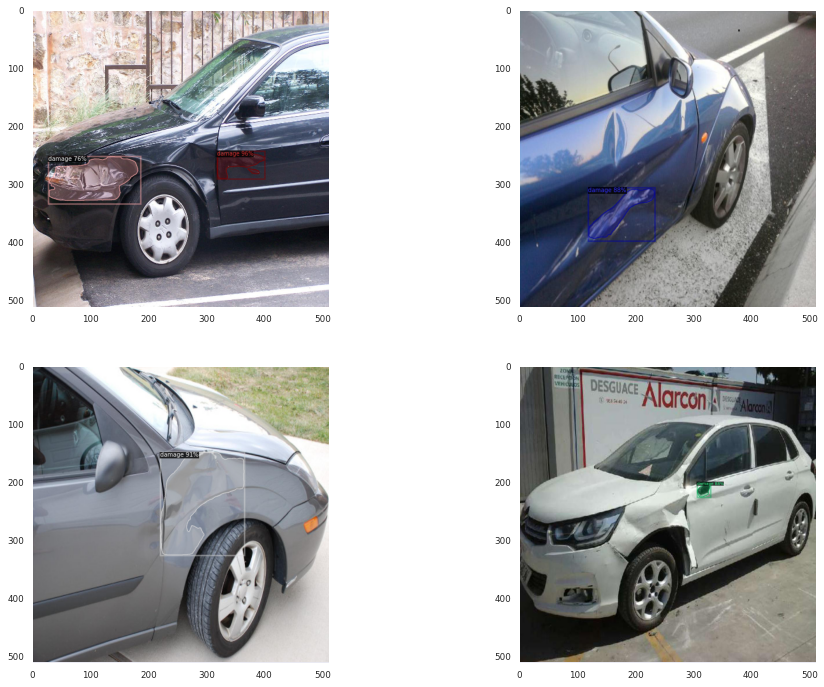

In [55]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(valid_dataset_dictionaries, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=valid_metadata_dictionaries, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])